<a href="https://colab.research.google.com/github/iambrookedrake/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/Brooke_Drake_DSPT6_U1S3M2_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [1]:
#find mean, variance and standard deviation without using library functions
import numpy as np

sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]
N=len(sales)
mean_sales = sum(sales)/N

vN=0
for i in sales:
  vN+= (i-mean_sales)**2
  var_sales = vN/N

std_sales = np.std(sales,ddof=1)
print("Mean of Sales is",mean_sales)
print("Variance of Sales is",var_sales)
print("Standard deviation of Sales is",std_sales)


Mean of Sales is 3052.714285714286
Variance of Sales is 183761.06122448976
Standard deviation of Sales is 463.0204150595357


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [2]:
import pandas as pd
cust = [127, 80, 105, 92, 120, 115, 93]
lastweek = {"sales": sales, "cust": cust}

LW = pd.DataFrame(lastweek)
cov = LW.cov()['sales'][1]
print(LW)
print(LW.cov())
print("")
print("Covariance between sales and customers is",cov)


   sales  cust
0   3505   127
1   2400    80
2   3027   105
3   2798    92
4   3700   120
5   3250   115
6   2689    93
               sales         cust
sales  214387.904762  7604.357143
cust     7604.357143   290.952381

Covariance between sales and customers is 7604.357142857142


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [3]:
std_cust = np.std(cust,ddof=1)

corr = cov/(std_sales*std_cust)
print("Standard deviation of customers is",std_cust)
print("Correlation coefficient of sales and customers is",corr)##Should be -1:1

Standard deviation of customers is 17.057326313123664
Correlation coefficient of sales and customers is 0.9628339778148909


In [4]:
Nc=len(cust)
mean_cust = sum(cust)/Nc

cN=0
for i in cust:
  cN+= (i-mean_cust)**2
  var_cust = cN/Nc

#std_cust = var_cust**(1/2)
print("Mean of Cust is",mean_cust)
print("Variance of Cust is",var_cust)
print("Standard deviation of Cust is",std_cust)


Mean of Cust is 104.57142857142857
Variance of Cust is 249.3877551020408
Standard deviation of Cust is 17.057326313123664


In [5]:
LW.corr()

,sales,cust
sales,1.000000,0.962834
cust,0.962834,1.000000


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [6]:
#Variance-covariance matrix
titanic = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')
titanic = titanic.drop(titanic.columns[0], axis=1)
titanic.cov()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [7]:
#Correlation matrix
titanic.corr()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

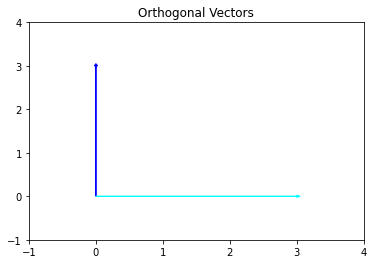

In [8]:
import matplotlib.pyplot as plt

vector_1 = [0,3]
vector_2 = [3,0]

# Plot the Scaled Vectors
plt.arrow(0,0, vector_1[0], vector_1[1],head_width=.05, head_length=0.05, color ='blue')
plt.arrow(0,0, vector_2[0], vector_2[1],head_width=.05, head_length=0.05, color ='cyan')
plt.xlim(-1,4)          
plt.ylim(-1,4)
plt.title("Orthogonal Vectors")
plt.show()

A synonym for orthogonal is Perpendicular

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [9]:
a=np.array([-5,3,7])
b=np.array([6,-8,2])
if np.dot(a,b)==0:
  print("These vector are orthogonal since their dot product equals 0")
else:
  print("These vectors are not orthogonal since their dot product does not equal 0. The dot product is",np.dot(a,b))

These vectors are not orthogonal since their dot product does not equal 0. The dot product is -40


## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [10]:
c=np.array([2,-15,6,20])
normsq_c = 0
for i in c:
  normsq_c += i**2
print("Norm C Squared is",normsq_c)
norm_c = np.linalg.norm(c)
print("Norm C Squared is",norm_c**2)
print("Dot product of c and c is",np.dot(c,c))
print(c.T*c)
print(sum(c.T*c))




Norm C Squared is 665
Norm C Squared is 665.0
Dot product of c and c is 665
[  4 225  36 400]
665


* Norm c Squared, The Dot Prouct of c and c, and the sum of the product of c.T * c and are all the same result.

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

d = 7[1 0] +12[0 1] = 7i+12j

e = 2[1 0 0] +11[0 1 0] -8[0 0 1] = 2i+11j-8k

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [22]:
f=np.array([4,12,11,9,2])
norm_f = np.linalg.norm(f)
print(f)
print(norm_f)
unit_f= f/norm_f
unit_f

[ 4 12 11  9  2]
19.131126469708992


array([0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454167])

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

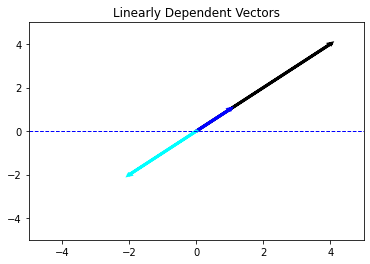

In [11]:
# Plot Linearly Dependent Vectors

# Axis Bounds
plt.xlim(-5,5)          
plt.ylim(-5,5)

# Original Vector
v = [1,1] 

# Scaled Vectors
v2 = np.multiply(4, v)
v3 = np.multiply(-2,v)

# Get Vals for L
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = 0*x_vals

# Plot Vectors and L
plt.plot(x_vals, y_vals, '--', color='b', linewidth=1)
plt.arrow(0,0, v2[0], v2[1], linewidth=3, head_width=.05, head_length=0.05, color ='black')
plt.arrow(0,0, v[0], v[1], linewidth=3, head_width=.05, head_length=0.05, color ='blue')
plt.arrow(0,0, v3[0], v3[1], linewidth=3, head_width=.05, head_length=0.05, color ='cyan')

plt.title("Linearly Dependent Vectors")
plt.show()

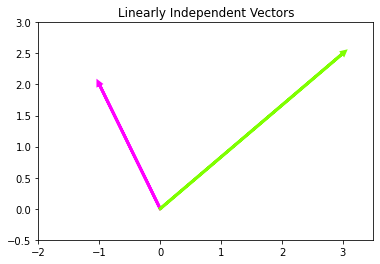

In [12]:
# Plot Linearly Inependent Vectors

# Axis Bounds
plt.xlim(-2,3.5)          
plt.ylim(-0.5,3)

# Original Vector
a = [-1,2] 
b = [3, 2.5]

# Plot Vectors
plt.arrow(0,0, a[0], a[1], linewidth=3, head_width=.05, head_length=0.05, color ='magenta')
plt.arrow(0,0, b[0], b[1], linewidth=3, head_width=.05, head_length=0.05, color ='chartreuse')

plt.title("Linearly Independent Vectors")
plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

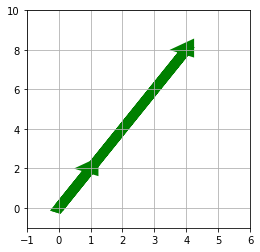

In [13]:
g=np.array([1,2])#= i+2j
h=np.array([4,8])#=4*(i+2j)=4*g
fig, ax = plt.subplots(figsize=(4,4))
ax.grid()
plt.xlim(-1,6)          
plt.ylim(-1,10)

# Display
for myvect in [g,h]:
    plt.arrow(0,0,
              myvect[0], 
              myvect[1], 
              head_width=.2, 
              head_length=0.2, 
              linewidth=10, 
              color='green')

Span is i+2j

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [14]:
l=[1,2,3]#= i+2j+3k
m=[-1,0,7]#= -i+7k
n=[4,8,2]#= 2*(2i+4j+k)
P=([l],[m],[n])
P

([[1, 2, 3]], [[-1, 0, 7]], [[4, 8, 2]])

Span is R^3

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



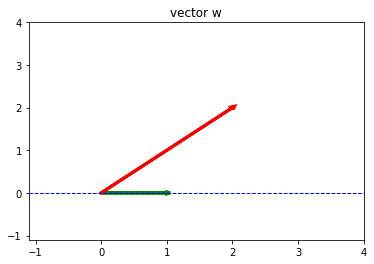

In [15]:
# Plot a line

# Axis Bounds
plt.xlim(-1.1,4)          
plt.ylim(-1.1,4)

# Original Vector
v = [1,0] 
w = [2,2]

# Get Vals for L
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = 0*x_vals

# Plot Vectors and L
plt.plot(x_vals, y_vals, '--', color='b', linewidth=1)
plt.arrow(0, 0, v[0], v[1], linewidth=3, head_width=.05, head_length=0.05, color ='green')
plt.arrow(0, 0, w[0], w[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')

plt.title("vector w")
plt.show()

## 6.2 What does it mean to form a basis?

To form a basis is to span the space in that vector field

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [16]:
print(np.array(P))
np.linalg.matrix_rank(P)

[[[ 1  2  3]]

 [[-1  0  7]]

 [[ 4  8  2]]]


array([1, 1, 1])

## 7.2 What does the rank of a matrix tell us?

Rank is the number of dimensions of the matrix used to form a linear transformation

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


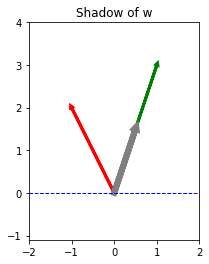

In [17]:
# Axis Bounds
plt.xlim(-2,2)          
plt.ylim(-1.1,4)

# Original Vector
import math 
v = [1,3] 
w = [-1,2]
vhyp=math.hypot(v[0],v[1])
whyp=math.hypot(w[0],w[1])

wAngleX = abs(np.arctan(w[1]/w[0]))
vAngleX = abs(np.arctan(v[1]/v[0]))
vAngleW = math.pi-wAngleX-vAngleX
n=np.cos(vAngleW)*whyp/vhyp

proj = np.multiply(n,v)

# Get Vals for L
axes = plt.gca()
plt.axes().set_aspect('equal')

x_vals = np.array(axes.get_xlim())
y_vals = 0*x_vals

# Plot Vectors and L
plt.plot(x_vals, y_vals, '--', color='b', linewidth=1)

plt.arrow(0, 0, v[0], v[1], linewidth=3, head_width=.05, head_length=0.05, color ='green')
plt.arrow(0, 0, w[0], w[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')
plt.arrow(0, 0, proj[0], proj[1], linewidth=6, head_width=.05, head_length=0.05, color ='gray')

plt.title("Shadow of w")
plt.show()



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


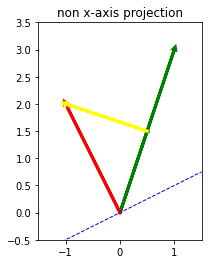

In [18]:
# Axis Bounds
plt.xlim(-1.5,1.5)          
plt.ylim(-0.5,3.5)

# Original Vector
v = [1,3] 
w = [-1,2]

vhyp=math.hypot(v[0],v[1])#length of v's hypotenuse
whyp=math.hypot(w[0],w[1])#length of w's hypotenuse
wAngleX = abs(np.arctan(w[1]/w[0]))#angle between w and x-axis
vAngleX = abs(np.arctan(v[1]/v[0]))#angle between v and x-axis
vAngleW = math.pi-wAngleX-vAngleX#angle between v and w
n=np.cos(vAngleW)*whyp/vhyp#n=c, scalar for v

proj = np.multiply(n,v)
x_minus_proj = w-proj

# Set axes
axes = plt.gca()
plt.axes().set_aspect('equal')

# Get Vals for L
x_vals = np.array(axes.get_xlim())
y_vals = 1/2*x_vals

# Plot Vectors and L
plt.plot(x_vals, y_vals, '--', color='b', linewidth=1)
plt.arrow(0, 0, proj[0], proj[1], linewidth=3, head_width=.05, head_length=0.05, color ='gray')
plt.arrow(0, 0, v[0], v[1], linewidth=3, head_width=.05, head_length=0.05, color ='green')
plt.arrow(0, 0, w[0], w[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')
plt.arrow(proj[0], proj[1], x_minus_proj[0], x_minus_proj[1], linewidth=3, head_width=.05, head_length=0.05, color = 'yellow')

plt.title("non x-axis projection")
plt.show()

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

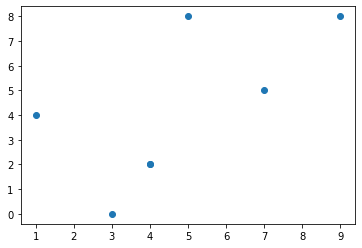

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()